In [1]:
library(ggtree)
library(ggplot2)
library(ape)
library(readr)
library(dplyr)


ggtree v3.6.2 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Shuangbin Xu, Lin Li, Xiao Luo, Meijun Chen, Wenli Tang, Li Zhan, Zehan
Dai, Tommy T. Lam, Yi Guan, Guangchuang Yu. Ggtree: A serialized data
object for visualization of a phylogenetic tree and annotation data.
iMeta 2022, 1(4):e56. doi:10.1002/imt2.56

G Yu. Data Integration, Manipulation and Visualization of Phylogenetic
Trees (1st ed.). Chapman and Hall/CRC. 2022. ISBN: 9781032233574 


Attaching package: ‘ape’


The following object is masked from ‘package:ggtree’:

    rotate



Attaching package: ‘dplyr’


The following object is masked from ‘package:

In [70]:
setwd("/master/nplatt/sch_hae_scan/results/mito")

In [78]:
# Read the nexus tree
tree <- read.tree("mito.raxml.support")

# Read the trait data
traits <- read_tsv("annot.tsv")

Rows: 171 Columns: 4
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): sample_name, country, host, kmeans_label

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [258]:
tree <- read.tree("mito.raxml.support")

# genotype_file <- system.file("annot.tsv", package="ggtree")
df <- read.table("annot.tsv", sep="\t", stringsAsFactor=F, header=TRUE)

rownames(df) <- df[,1]
df <- df[,-1]

df

,country,host,kmeans_label
,<chr>,<chr>,<chr>
Sb_NG_au_1.2,Nigeria,Cow,S. bovis
Sb_NG_au_2.10,Nigeria,Cow,S. bovis
Sb_NG_au_2.13,Nigeria,Cow,S. bovis
Sb_NG_au_2.5,Nigeria,Cow,S. bovis
Sb_NG_au_2.6,Nigeria,Cow,S. bovis
Sb_NG_be_1.10,Nigeria,Cow,S. bovis
Sb_NG_be_1.3,Nigeria,Cow,S. bovis
Sb_NG_be_1.5,Nigeria,Cow,S. bovis
Sb_NG_en_1.1,Nigeria,Cow,S. bovis


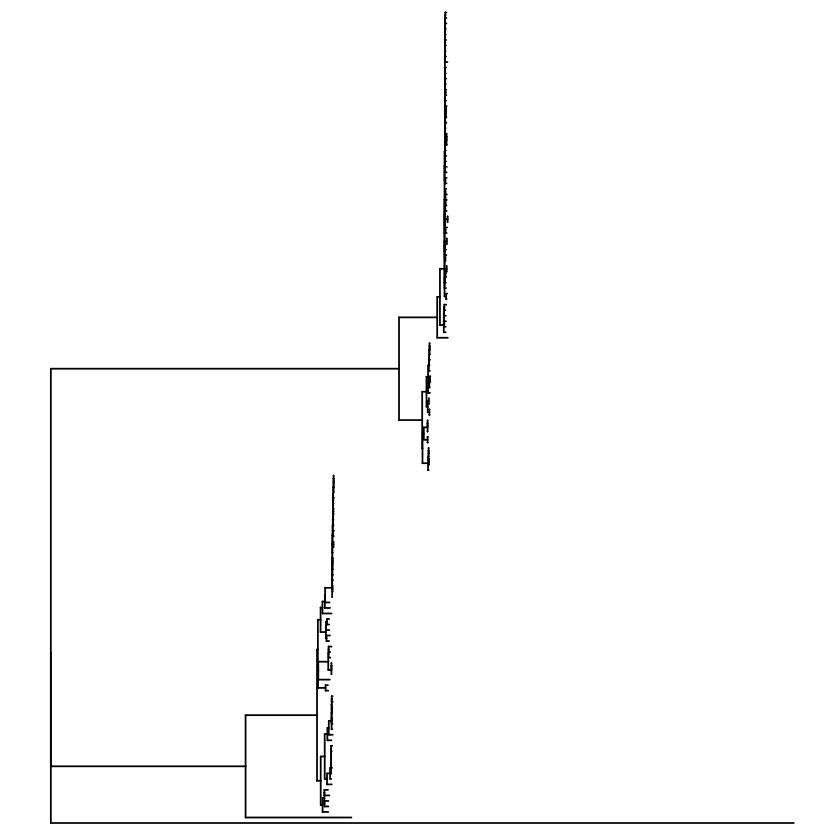

In [190]:
root="intercalatum_drcongo_ERR119613"

tree<-root(tree, outgroup=root, edgelabel=TRUE)

p <- ggtree(tree)

print(p)

In [259]:
p1 <- gheatmap(p, df) +
    scale_fill_manual(values=c("Angola"= "#FF0000",
"Eswatini"= "#FF1C00",
"Ethiopia"= "#FF3800",
"Kenya"= "#FF5500",
"Madagascar"= "#FF7100",
"Namibia"= "#FF8D00",
"Tanzania"= "#FFAA00",
"Uganda"= "#FFC600",
"Zambia"= "#FFE200",
"Zanzibar"= "#FFFF00",
"Cameroon" = "#0000FF",
"Cote d Ivoire" = "#0019E5",
"Egypt" = "#0033CC",
"Gambia" = "#004CB2",
"Guinea-Bissau" = "#006699",
"Liberia" = "#007F7F",
"Mali" = "#009965",
"Niger" = "#00B24C",
"Nigeria" = "#00CC32",
"Senegal" = "#00E519",
"Sudan" = "#00FF00"
))




Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [ ]:
install.packages("svglite")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [262]:
ggsave("mito_w_traits.svg", p1, width = 10, height = 10)

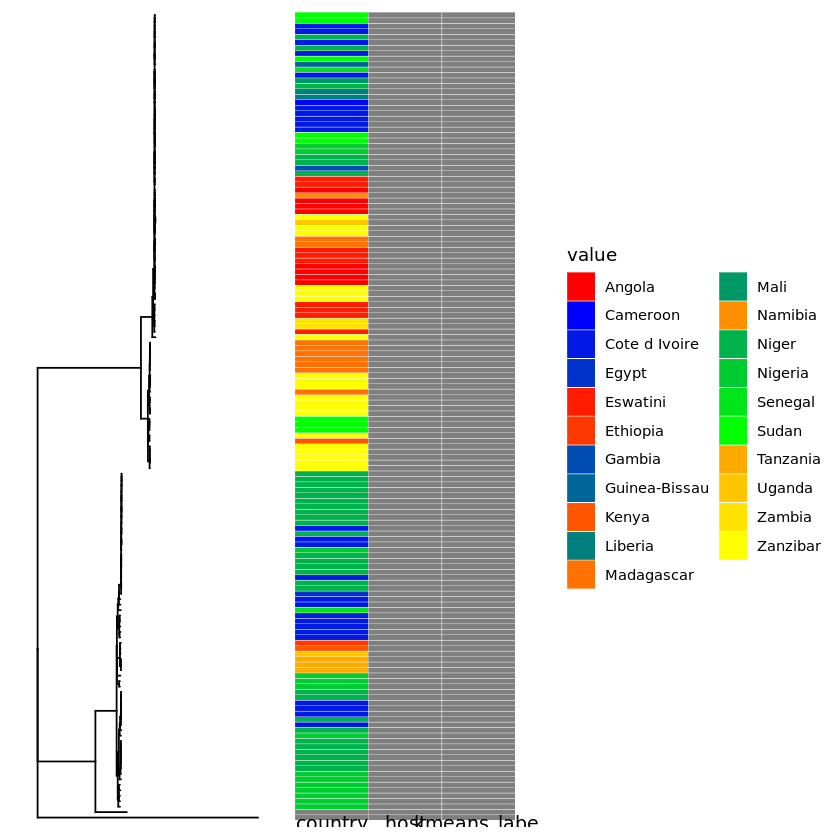

In [261]:
print(p1)

 [1] "#0000FF" "#0019E5" "#0033CC" "#004CB2" "#006699" "#007F7F" "#009965"
 [8] "#00B24C" "#00CC32" "#00E519" "#00FF00"


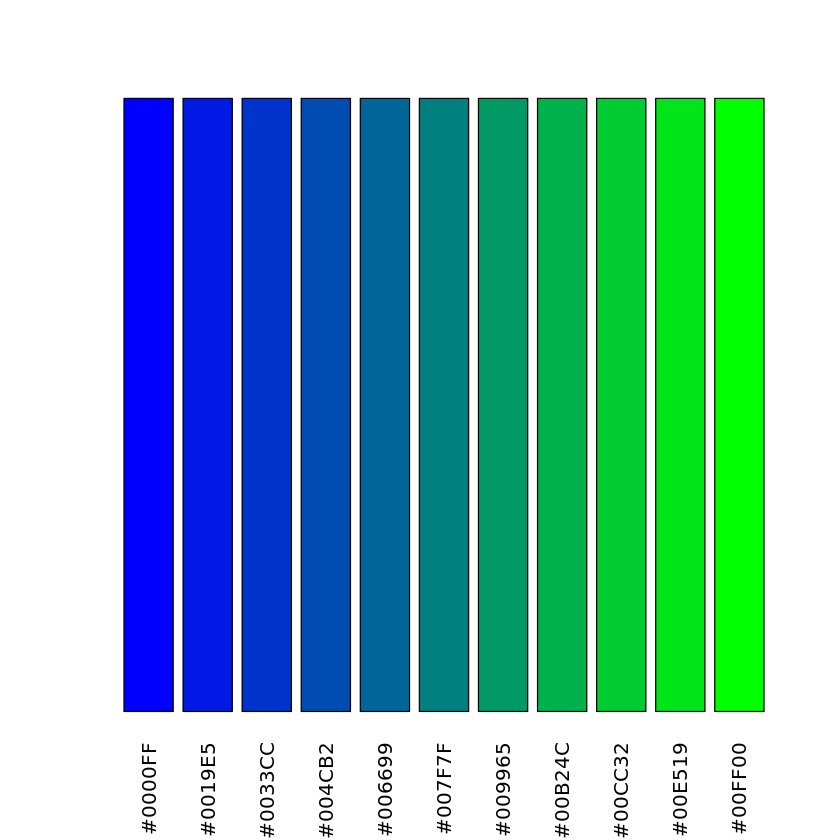

In [222]:
# Load the necessary library
library(grDevices)

# Define the start and end colors
start_color <- "blue"
end_color <- "green"

# Define the number of colors you want
num_colors <- 11

# Create a color ramp palette
palette <- colorRampPalette(c(start_color, end_color))

# Generate the color codes
bg_color_codes <- palette(num_colors)

# Print the color codes
print(bg_color_codes)

# Create a simple plot to visualize the color codes
barplot(rep(1, num_colors), col = bg_color_codes, axes = FALSE, names.arg = bg_color_codes, las = 2)


 [1] "#FF0000" "#FF1C00" "#FF3800" "#FF5500" "#FF7100" "#FF8D00" "#FFAA00"
 [8] "#FFC600" "#FFE200" "#FFFF00"


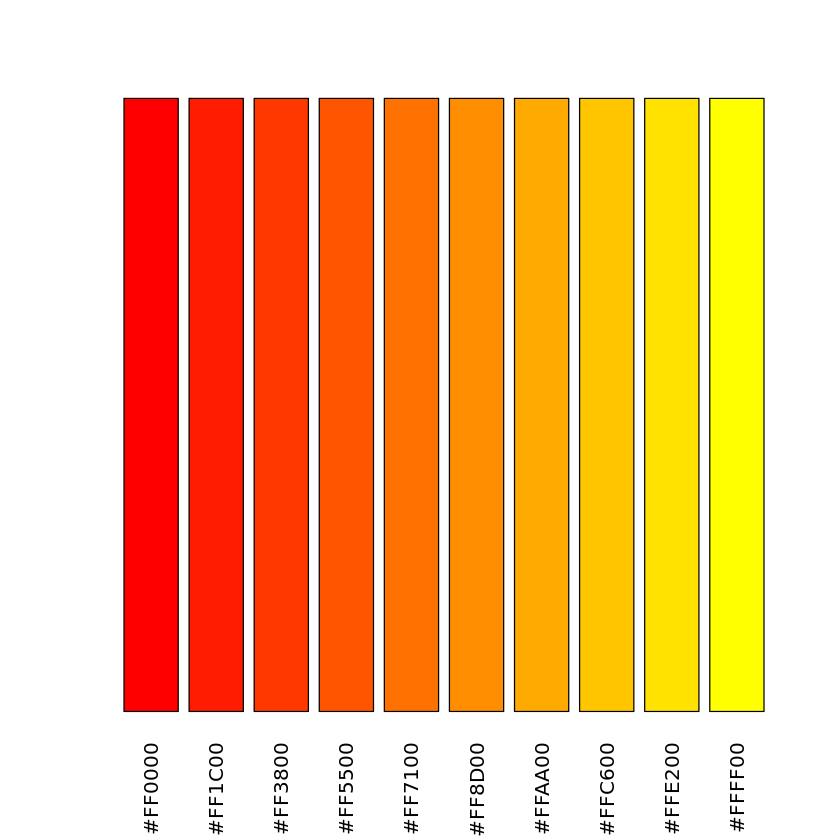

In [223]:
# Load the necessary library
library(grDevices)

# Define the start and end colors
start_color <- "red"
end_color <- "yellow"

# Define the number of colors you want
num_colors <- 7

# Create a color ramp palette
palette <- colorRampPalette(c(start_color, end_color))

# Generate the color codes
ro_color_codes <- palette(num_colors)

# Print the color codes
print(ro_color_codes)

# Create a simple plot to visualize the color codes
barplot(rep(1, num_colors), col = ro_color_codes, axes = FALSE, names.arg = ro_color_codes, las = 2)


In [17]:
setwd("/master/nplatt/sch_hae_scan/results/svdq")

In [21]:
tree <- read.tree("svdq_indv_constree.nwk")

# genotype_file <- system.file("annot.tsv", package="ggtree")
df <- read.table("annot.tsv", sep="\t", stringsAsFactor=F, header=TRUE)

rownames(df) <- df[,1]
df <- df[,-1]

df

,country,host,kmeans_label
,<chr>,<chr>,<chr>
Sb_NG_au_1.2,Nigeria,Cow,S. bovis
Sb_NG_au_2.10,Nigeria,Cow,S. bovis
Sb_NG_au_2.13,Nigeria,Cow,S. bovis
Sb_NG_au_2.5,Nigeria,Cow,S. bovis
Sb_NG_au_2.6,Nigeria,Cow,S. bovis
Sb_NG_be_1.10,Nigeria,Cow,S. bovis
Sb_NG_be_1.3,Nigeria,Cow,S. bovis
Sb_NG_be_1.5,Nigeria,Cow,S. bovis
Sb_NG_en_1.1,Nigeria,Cow,S. bovis


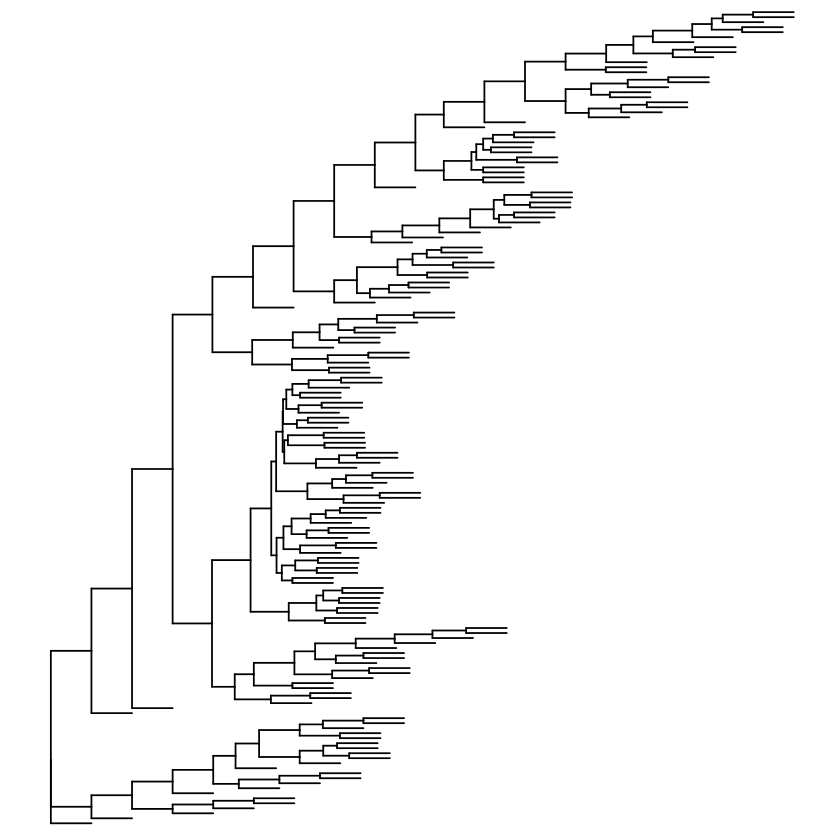

In [22]:
root="margrebowiei_zambia_ERR310940"

tree<-root(tree, outgroup=root, edgelabel=TRUE)

p <- ggtree(tree)

print(p)

In [23]:
p1 <- gheatmap(p, df) +
    scale_fill_manual(values=c("Angola"= "#FF0000",
"Eswatini"= "#FF1C00",
"Ethiopia"= "#FF3800",
"Kenya"= "#FF5500",
"Madagascar"= "#FF7100",
"Namibia"= "#FF8D00",
"Tanzania"= "#FFAA00",
"Uganda"= "#FFC600",
"Zambia"= "#FFE200",
"Zanzibar"= "#FFFF00",
"Cameroon" = "#0000FF",
"Cote d Ivoire" = "#0019E5",
"Egypt" = "#0033CC",
"Gambia" = "#004CB2",
"Guinea-Bissau" = "#006699",
"Liberia" = "#007F7F",
"Mali" = "#009965",
"Niger" = "#00B24C",
"Nigeria" = "#00CC32",
"Senegal" = "#00E519",
"Sudan" = "#00FF00"
))




Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [ ]:
install.packages("svglite")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [25]:
ggsave("mito_w_traits.svg", p1, width = 10, height = 10)

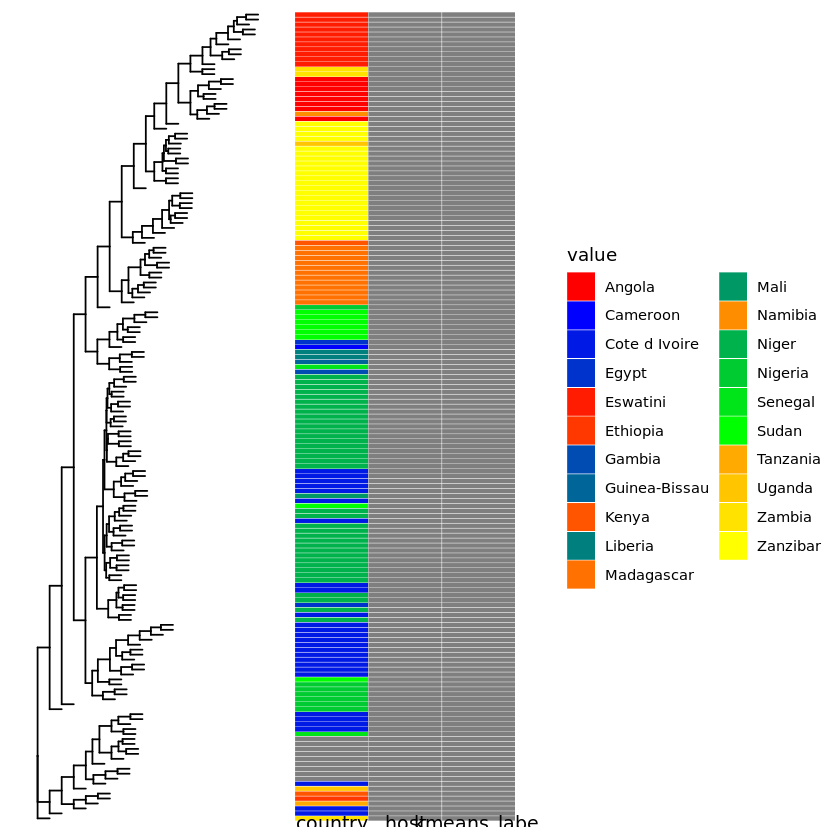

In [24]:
print(p1)

In [ ]:
#read in 

In [2]:
setwd("/master/nplatt/sch_hae_scan/results/cox_its")

In [9]:
tree <- read.tree("its_inf_expanded.raxml.support_BS10.nwk")

# genotype_file <- system.file("annot.tsv", package="ggtree")
df <- read.table("its_sites.tsv", sep="\t", stringsAsFactor=F, header=TRUE)

rownames(df) <- df[,1]
df <- df[,-1]

df

,X21293248.30,X21293900.682,X21293955.737,X21294005.787,X21294075.857
,<int>,<chr>,<chr>,<chr>,<chr>
bovis_ethiopia_SRR13579874,0,0,0,0,0
bovis_keyna_SRR13579878,0,0,0,0,0
bovis_senegal_SRR13579876,0,0,0,0,0
bovis_tanzania_ERR103048,0,0,0,0,0
bovis_tanzania_SRR7867225,0,0,0,0,0
bovis_tanzania_SRR7867226,0,0,0,0,.
margrebowiei_zambia_ERR310940,0,0,0,0,0
Sb_NG_au_1.2,0,0,0,0,0
Sb_NG_au_2.10,0,0,0,0,0


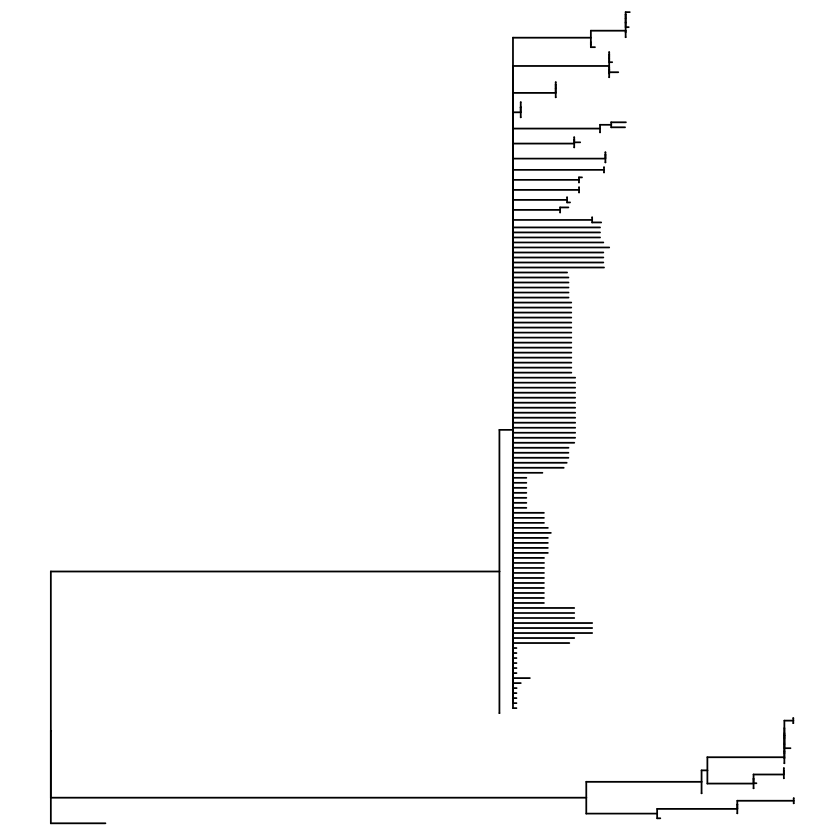

In [10]:
root="margrebowiei_zambia_ERR310940"

tree<-root(tree, outgroup=root, edgelabel=TRUE)

p <- ggtree(tree)

print(p)

In [14]:
p1 <- gheatmap(p, df) +
    scale_fill_manual(values=c("0"= "red",
"1"= "purple",
"2"= "blue"
))




Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [12]:
install.packages("svglite")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [16]:
ggsave("its_phylo_w_sites.svg", p1, width = 10, height = 10)

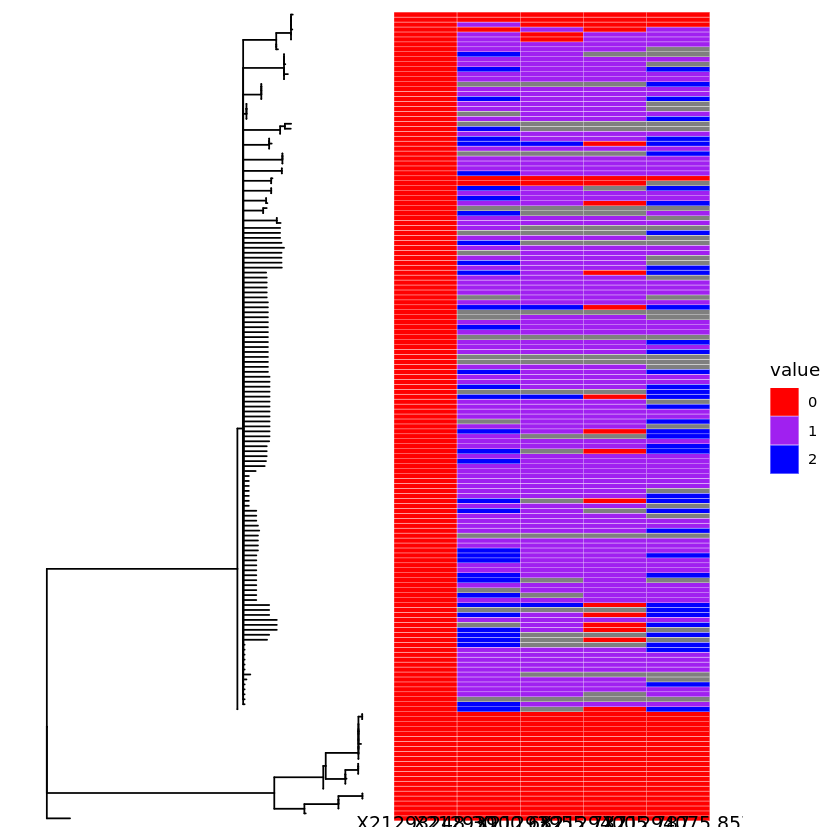

In [15]:
print(p1)

 [1] "#0000FF" "#0019E5" "#0033CC" "#004CB2" "#006699" "#007F7F" "#009965"
 [8] "#00B24C" "#00CC32" "#00E519" "#00FF00"


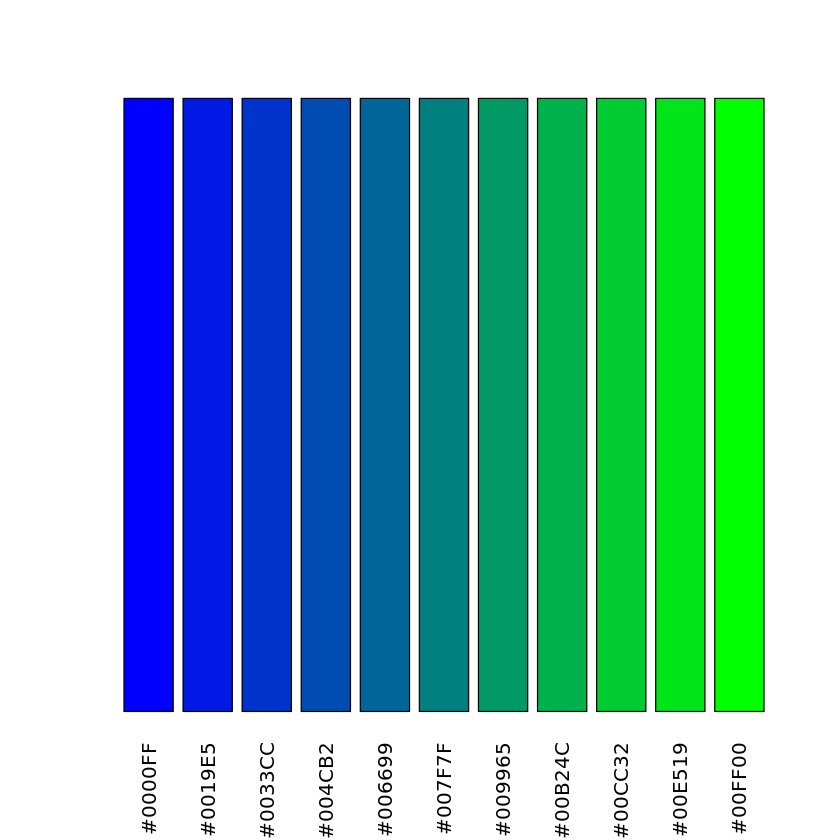

In [222]:
# Load the necessary library
library(grDevices)

# Define the start and end colors
start_color <- "blue"
end_color <- "green"

# Define the number of colors you want
num_colors <- 11

# Create a color ramp palette
palette <- colorRampPalette(c(start_color, end_color))

# Generate the color codes
bg_color_codes <- palette(num_colors)

# Print the color codes
print(bg_color_codes)

# Create a simple plot to visualize the color codes
barplot(rep(1, num_colors), col = bg_color_codes, axes = FALSE, names.arg = bg_color_codes, las = 2)


 [1] "#FF0000" "#FF1C00" "#FF3800" "#FF5500" "#FF7100" "#FF8D00" "#FFAA00"
 [8] "#FFC600" "#FFE200" "#FFFF00"


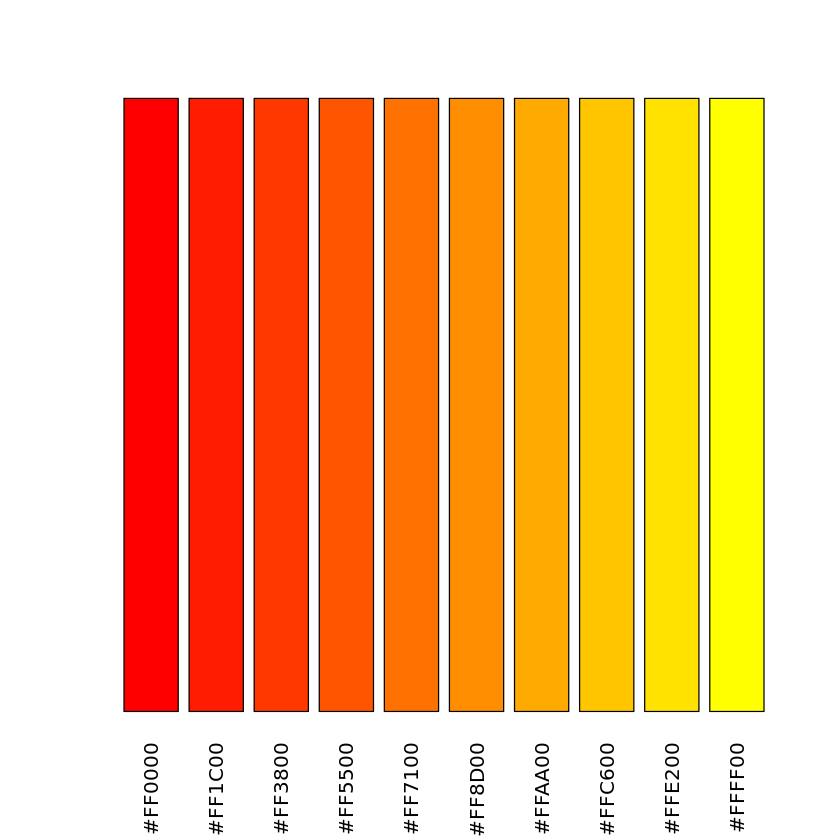

In [223]:
# Load the necessary library
library(grDevices)

# Define the start and end colors
start_color <- "red"
end_color <- "yellow"

# Define the number of colors you want
num_colors <- 7

# Create a color ramp palette
palette <- colorRampPalette(c(start_color, end_color))

# Generate the color codes
ro_color_codes <- palette(num_colors)

# Print the color codes
print(ro_color_codes)

# Create a simple plot to visualize the color codes
barplot(rep(1, num_colors), col = ro_color_codes, axes = FALSE, names.arg = ro_color_codes, las = 2)
